In [ ]:
import torch
print(torch.__version__)
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import os
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader,Dataset
from tqdm import tqdm_notebook as tqdm

1.8.1+cu101


In [ ]:
data_dir = '/content/drive/MyDrive/Resampled_data'

image_1 = 'DU01_image_r.nii'
label_1 = 'DU01_label_r.nii'
image_2 = 'DU06_images_r.nii'
label_2 = 'DU06_labels_r.nii' 
image_3 = 'patient2_left_image_r.nii' 
label_3 = 'Patient2_left_label_r.nii'
image_4 = 'patient4_right_image_r.nii'
label_4 = 'patient4_right_label_r.nii' 
image_5 = 'DU07_images_r.nii' 
label_5 = 'DU07_labels_r.nii'
image_6 = 'patient6_right_image_r.nii' 
label_6 = 'patient6_right_label_r.nii'
image_7 = 'DU03_image_r.nii' 
label_7 = 'DU03_label_r.nii'
image_8 = 'patient3_image_r.nii' 
label_8 = 'patient3_label_r.nii'

In [ ]:
'''
from dice_score import *
from knee_init import *
#from mdl_ex
'''
from net_new import *

In [ ]:

#Training :
image_1 = nib.load(os.path.join(data_dir,image_1)).get_fdata()[:, :, :, np.newaxis]
label_1 = nib.load(os.path.join(data_dir,label_1)).get_fdata()#[:, :, :, np.newaxis]
image_2 = nib.load(os.path.join(data_dir,image_2)).get_fdata()[:, :, :, np.newaxis]
label_2 = nib.load(os.path.join(data_dir,label_2)).get_fdata()#[:, :, :, np.newaxis]

image_3 = nib.load(os.path.join(data_dir,image_3)).get_fdata()[:, :, :, np.newaxis]
label_3 = nib.load(os.path.join(data_dir,label_3)).get_fdata()#[:, :, :, np.newaxis]
image_4 = nib.load(os.path.join(data_dir,image_4)).get_fdata()[:, :, :, np.newaxis]
label_4 = nib.load(os.path.join(data_dir,label_4)).get_fdata()#[:, :, :, np.newaxis]
image_5 = nib.load(os.path.join(data_dir,image_5)).get_fdata()[:, :, :, np.newaxis]
label_5 = nib.load(os.path.join(data_dir,label_5)).get_fdata()#[:, :, :, np.newaxis]

image_6 = nib.load(os.path.join(data_dir,image_6)).get_fdata()[:, :, :, np.newaxis]
label_6 = nib.load(os.path.join(data_dir,label_6)).get_fdata()#[:, :, :, np.newaxis]
image_7 = nib.load(os.path.join(data_dir,image_7)).get_fdata()[:, :, :, np.newaxis]
label_7 = nib.load(os.path.join(data_dir,label_7)).get_fdata()#[:, :, :, np.newaxis]

image_8 = nib.load(os.path.join(data_dir,image_8)).get_fdata()[:, :, :, np.newaxis]
label_8 = nib.load(os.path.join(data_dir,label_8)).get_fdata()#[:, :, :, np.newaxis]

In [ ]:
#changing the range from 0-255 to 0-1 for labels 
label_1 = (np.array(label_1) > 0).astype(np.int)   
label_2 = (np.array(label_2) > 0).astype(np.int)
label_3 = (np.array(label_3) > 0).astype(np.int)
label_4 = (np.array(label_4) > 0).astype(np.int)   
label_5 = (np.array(label_5) > 0).astype(np.int)
label_6 = (np.array(label_6) > 0).astype(np.int)
label_7 = (np.array(label_7) > 0).astype(np.int)
label_8 = (np.array(label_8) > 0).astype(np.int)

In [ ]:
image_1 = torch.from_numpy(image_1)#.float()
label_1 = torch.from_numpy(label_1)#.long()
image_2 = torch.from_numpy(image_2)#.float()
label_2 = torch.from_numpy(label_2)#.long()
image_3 = torch.from_numpy(image_3)#.float()
label_3 = torch.from_numpy(label_3)#.long()
image_4 = torch.from_numpy(image_4)#.float()
label_4 = torch.from_numpy(label_4)#.long()
image_5 = torch.from_numpy(image_5)#.float()
label_5 = torch.from_numpy(label_5)#.long()
image_6 = torch.from_numpy(image_6)#.float()
label_6 = torch.from_numpy(label_6)#.long(
image_7 = torch.from_numpy(image_7)#.float()
label_7 = torch.from_numpy(label_7)#.long()
image_8 = torch.from_numpy(image_8)#.float()
label_8 = torch.from_numpy(label_8)

In [ ]:
image_1 = image_1.permute(3,0,1,2).unsqueeze(0)
label_1 = label_1.unsqueeze(0)
image_2 = image_2.permute(3,0,1,2).unsqueeze(0)
label_2 = label_2.unsqueeze(0)
image_3 = image_3.permute(3,0,1,2).unsqueeze(0)
label_3 = label_3.unsqueeze(0)
image_4 = image_4.permute(3,0,1,2).unsqueeze(0)
label_4 = label_4.unsqueeze(0)
image_5 = image_5.permute(3,0,1,2).unsqueeze(0)
label_5 = label_5.unsqueeze(0)
image_6 = image_6.permute(3,0,1,2).unsqueeze(0)
label_6 = label_6.unsqueeze(0)
image_7 = image_7.permute(3,0,1,2).unsqueeze(0)
label_7 = label_7.unsqueeze(0)
image_8 = image_8.permute(3,0,1,2).unsqueeze(0)
label_8 = label_8.unsqueeze(0)

In [ ]:
print(label_6.shape)

torch.Size([1, 135, 169, 67])


In [ ]:
class KneeDataset(Dataset):
  
    def __init__(self, images, labels,transform=None):
        """
        Args:
            #
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        #self.root_dir = root_dir
        #self.label_dir = label_dir
        
        self.images = images
        self.labels =  labels
        self.transform = transform   
        
    def __len__(self):
        #imgs_fname = [name for name in os.listdir(self.root_dir) if name.find('slice_')!=-1]
        return self.images.shape[0]

    def __getitem__(self,idx):
        item =  {'image':self.images[idx],'label':self.labels[idx]}
        

        
        if self.transform:
            item = self.transform(item)
        
        return item


In [ ]:
def dice(outputs, labels, max_label):
    dice = torch.FloatTensor(max_label-1).fill_(0)
    for i in range(1, max_label):
  
      outputs = (outputs== i).view(-1).float()
      labels =  (labels== i).view(-1).float()
      intersect = torch.dot(outputs, labels)
      union = torch.add(torch.sum(outputs), torch.sum(labels))
      dice[i-1] = (2 * intersect+ 1e-5) / (union + 1e-5)
    return dice


'''def dice_coeff(outputs, labels, max_label):
    dice = torch.FloatTensor(max_label-1).fill_(0)
    for label_num in range(1, max_label):
        iflat = (outputs==label_num).view(-1).float()
        tflat = (labels==label_num).view(-1).float()
        intersection = torch.mean(iflat * tflat)
        dice[label_num-1] = (2. * intersection) / (1e-8 + torch.mean(iflat) + torch.mean(tflat))
    return dice'''

def augmentAffine(img_in, seg_in, strength=0.05):
    B,C,H,W = img_in.size()
    affine_matrix = (torch.eye(2,3).unsqueeze(0) + torch.randn(B, 2, 3) * strength).to(img_in.device)

    meshgrid = F.affine_grid(affine_matrix,torch.Size((B,1,H,W)))

    img_out = F.grid_sample(img_in, meshgrid,padding_mode='border')
    seg_out = F.grid_sample(seg_in.float().unsqueeze(1), meshgrid, mode='nearest').long().squeeze(1)

    return img_out, seg_out





In [ ]:
transformed_train_dataset_1 = KneeDataset(image_1, label_1,
                                        transform =None)
transformed_train_dataset_2 = KneeDataset(image_2, label_2,
                                        transform =None)
transformed_train_dataset_3 = KneeDataset(image_3, label_3,
                                       transform =None)
transformed_train_dataset_4 = KneeDataset(image_4, label_4,
                                        transform =None)
transformed_train_dataset_5 = KneeDataset(image_7, label_7,
                                       transform =None)
transformed_train_dataset_6 = KneeDataset(image_8, label_8,
                                        transform =None)

transformed_valid_dataset_1 = KneeDataset(image_5, label_5,
                                       transform=None)
transformed_valid_dataset_2 = KneeDataset(image_6, label_6,
                                      transform=None)
transformed_train_dataset = torch.utils.data.ConcatDataset([transformed_train_dataset_1, transformed_train_dataset_2,
                                                           transformed_train_dataset_3,transformed_train_dataset_4,
                                                            transformed_train_dataset_5,transformed_train_dataset_6])
transformed_valid_dataset = torch.utils.data.ConcatDataset([transformed_valid_dataset_1, transformed_valid_dataset_2])
image_datasets = {'train':transformed_train_dataset,
                  'valid':transformed_valid_dataset,
                  }
dataloaders_tmp = {'train' : torch.utils.data.DataLoader(image_datasets['train'], 
                                                        batch_size=2, shuffle = True, num_workers = 4),
                  'valid': torch.utils.data.DataLoader(image_datasets['valid'], batch_size=2,
                                             shuffle=True, num_workers=4),
                  
                  }

dataset_sizes = {x: len(image_datasets[x]) for x in ['train','valid']}
print(dataset_sizes)

{'train': 6, 'valid': 2}


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
batch_tmp = next(iter(dataloaders_tmp['train']))
inputs_tmp = batch_tmp['image']
label_tmp = batch_tmp['label']
print(inputs_tmp.shape) 
print(label_tmp.shape)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([2, 1, 135, 169, 67])
torch.Size([2, 135, 169, 67])


In [ ]:
batch_tmp = next(iter(dataloaders_tmp['valid']))
inputs_tmp = batch_tmp['image']
label_tmp = batch_tmp['label']
print(inputs_tmp.shape)
print(label_tmp.shape)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([2, 1, 135, 169, 67])
torch.Size([2, 135, 169, 67])


In [ ]:
class UNet_3d(nn.Module):
  def __init__(self, input_channels =1, num_classes = 2):
    super(UNet_3d, self).__init__()
    self.input_channels = input_channels
    
    ####DOWNSAMPLING####
    self.conv1 = Downconv(1, 32)

    self.maxpool1 = nn.MaxPool3d(kernel_size =2)
    self.conv2 = Downconv(32,64)
    self.maxpool2 = nn.MaxPool3d(kernel_size =2)
    self.conv3 = Downconv(64,128)
    self.maxpool3 = nn.MaxPool3d(kernel_size =2)
    self.conv4 = Downconv(128,256)
    self.maxpool4 = nn.MaxPool3d(kernel_size =2)

    self.conv5 = Downconv(256,512)


    ####UPSAMPLINIG####
    self.upconv4 = Upconv(512,256)
    self.upconv3 = Upconv(256,128)
    self.upconv2 = Upconv(128,64)
    self.upconv1 = Upconv(64,32)

    ####Final/Output####

    self.output = output(32,num_classes)

  def forward(self, inputs):
     
    
    conv1 = self.conv1(inputs)
    #print("conv1", conv1.shape)
    maxpool1 = self.maxpool1(conv1)

    conv2 = self.conv2(maxpool1)
    #print("conv2", conv2.shape)
    maxpool2 = self.maxpool2(conv2)

    conv3 = self.conv3(maxpool2)
    #print("conv3", conv3.shape)
    maxpool3 = self.maxpool3(conv3)

    conv4 = self.conv4(maxpool3)
    maxpool4 = self.maxpool4(conv4)

    
    center = self.conv5(maxpool4)    # final convolution of encoderpart without maxpool layer
    #print("center",conv4.shape) 
    up4 = self.upconv4(center,conv4)
    #print("up4", up4.shape)
    up3 = self.upconv3(up4,conv3)
    #print("up3", up3.shape)
    up2 = self.upconv2(up3,conv2)
    up1 = self.upconv1(up2,conv1)

    output = self.output(up1)      # output layer/ final layer 

    return output
  @staticmethod
  def apply_argmax_softmax(pred):
    log_p = F.softmax(pred, dim=1)

    return log_p

In [ ]:
# initialise network weights
def init_weights(m):
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv3d) or isinstance(m, nn.ConvTranspose3d):
        nn.init.kaiming_normal_(m.weight)
        if m.bias is not None:
            nn.init.constant_(m.bias, 0.0)

In [ ]:
criterion = nn.CrossEntropyLoss().cuda() ## Loss
net = UNet_3d()
net.apply(init_weights)
net.cuda()

total_epocs_var = 500 #500

#print(countParameters(net))

optimizer = optim.Adam(list(net.parameters()),lr=0.002)

In [ ]:
train_loss = torch.zeros(total_epocs_var)/0
val_loss = torch.zeros(total_epocs_var)/0
dice1 = []  #torch.zeros(500)/0
dice2 = 0
dice3 =[]

run_dice = []  #torch.zeros(500)/0
run_dice2 = 0
run_dice3 = []
for epoch_i in range(total_epocs_var):
    net.train()
    train_loss[epoch_i] = 0.0
    batch_dice_t = 0
    batch_dice_mean_t = 0
    i=0
    
           
      ####MODEL EXPERIMENT####
    for i, batch in enumerate(dataloaders_tmp['train']):
    
        optimizer.zero_grad()
        inputs = batch['image'].float().cuda()
        label = batch['label'].long().cuda()
        #inputs,label = augmentAffine(inputs,label,0.075)      
        output = net(inputs)
        loss = criterion(output,label)
        loss.backward()
        optimizer.step() 
        train_loss[epoch_i] += loss.item()
        d1 = dice(output.argmax(1), label,2)
        batch_dice_t += d1
        i = i +1
        batch_dice_mean_t += d1.mean().cpu()

    train_loss[epoch_i] /= i
    batch_dice_t/=i
    batch_dice_mean_t/=i
    dice2+=batch_dice_t   
    dice1.append(batch_dice_t)
    dice3.append(batch_dice_mean_t)
        
    if(True):
        net.eval()
        with torch.no_grad():
            val_loss[epoch_i] = 0.0
            batch_dice = 0
            batch_dice_mean = 0
            i=0
            
            for i, batch in enumerate(dataloaders_tmp['valid']):
                inputs_v = batch['image'].float().cuda()
                label_v = batch['label'].long().cuda()
                #inputs_v,label_v = augmentAffine(inputs_v,label_v,0.075)
                output_v = net(inputs_v)
                v_loss = criterion(output_v,label_v)
                val_loss[epoch_i] += v_loss.item()
                #scheduler_RLR.step(v_loss)
                
            
                d1 = dice(output_v.argmax(1), label_v, 2)
                
                batch_dice += d1
                i = i+1
                batch_dice_mean += d1.mean().cpu()
              
            val_loss[epoch_i]/=i
            batch_dice/=i
            batch_dice_mean/=i
            
            run_dice2+=batch_dice
            run_dice.append(batch_dice)
            run_dice3.append(batch_dice_mean)
            
        if(epoch_i%25==5):
            #print('Run Dice 2 All Labels Average',run_dice2/epoch_i)
            print('epoch',epoch_i,'train loss',train_loss[epoch_i], 'val loss',val_loss[epoch_i],'dice train',dice3[epoch_i],'dice',run_dice3[epoch_i])
            print('run_dice[epoch] Average',torch.tensor(run_dice3).float().mean())
            
print('Run Dice 2 All Labels Average Final',run_dice2/total_epocs_var)       
            


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
!nvidia-smi

Thu Feb 25 14:13:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    42W /  70W |  10640MiB / 15109MiB |    100%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
  #Saving the model after training 
torch.save(net.train().cpu(),'/content/drive/MyDrive/Resampled_data/trained_3d1')
torch.save(net.eval().cpu(),'/content/drive/MyDrive/Resampled_data/validated_3d1') #state_dict not required 
  # change the path depending on where you want to save in drive 

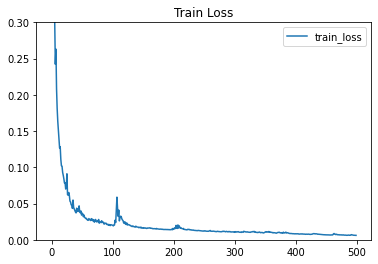

<Figure size 432x288 with 0 Axes>

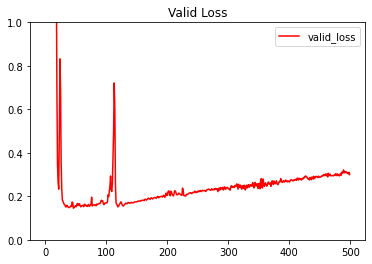

<Figure size 432x288 with 0 Axes>

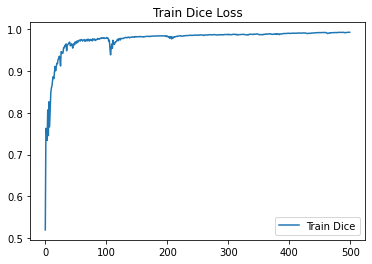

<Figure size 432x288 with 0 Axes>

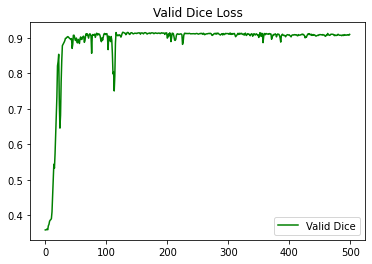

<Figure size 432x288 with 0 Axes>

In [ ]:
# graphs for loss
epoc=range(total_epocs_var)
plt.plot(epoc,train_loss.cpu().numpy(),label='train_loss')
plt.ylim(0,0.3)
plt.legend()
plt.title('Train Loss')
plt.figure()
plt.show()

plt.plot(epoc,val_loss.cpu().numpy(),'r',label='valid_loss')
plt.ylim(0,1)
plt.legend()
plt.title('Valid Loss')
plt.figure()
plt.show()

plt.plot(epoc,dice3,label='Train Dice')
#plt.plot(epoc,val_l,label='Val_loss')
plt.legend()
plt.title('Train Dice Loss')
plt.figure()
plt.show()


plt.plot(epoc,run_dice3,'g',label='Valid Dice')
#plt.plot(epoc,val_l,label='Val_loss')
#plt.ylim(0.3,1)
plt.legend()
plt.title('Valid Dice Loss')
plt.figure()
plt.show()